In [1]:
import pandas as pd 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
page_views = pd.read_csv('datasets/case_study_pageviews.csv', parse_dates=['timestamp', 'article_publication_date'], keep_date_col=True)
page_views.sample(4)

,user_id,timestamp,page_path,page_title,campaign,page_referrer,article_publication_date,article_format
108734,1597288,2020-09-07 02:09:00,/recipes/roasted-asparagus-salad-boursin,Roasted Asparagus Salad with Boursin Cheese - ...,email,NaN,2020-07-22,Recipe
67231,1574173,2020-09-03 19:22:00,/recipes/ice-cream-cone-cannoli,Ice-Cream Cone Cannoli Recipe - PureWow,email,NaN,2020-08-26,Recipe
24752,4804772,2020-09-02 13:20:00,/food/what-to-make-with-pork-chops,The 30 Best Side Dishes for Pork Chops - PureWow,NaN,https://www.purewow.com/food/cake-mix-secret-i...,2020-09-01,Slideshow
7706,678926,2020-09-01 14:16:00,/food/best-vanilla-ice-cream,"9 Best Vanilla Ice-Cream Brands, Ranked - PureWow",email,https://www.purewow.com/food/best-vanilla-ice-...,2020-08-22,List


In [3]:
subscribers = pd.read_csv('datasets/case_study_subscribers.csv',parse_dates=['subscription_date'], keep_date_col=True)
subscribers.sample(4)

,user_id,subscription_date,recipe_section_pageviews,food_section_pageviews,fashion_section_pageviews,beauty_section_pageviews,news_section_pageviews
21678,2145352,2014-07-12 21:05:47,1,0,0,0,1
5643,3093542,2016-04-11 16:47:41,1,0,2,0,5
29306,1296873,2013-04-04 12:11:32,0,1,0,0,0
12994,1342329,2013-05-15 14:45:07,5,4,0,0,4


### Explorative Analysis 

1. Number of subscriber per Year & Month
2. Number of Campaigns 
3. When was most articles were published?
4. Count of Article format 
5. Descriptive statistics of subscribers 

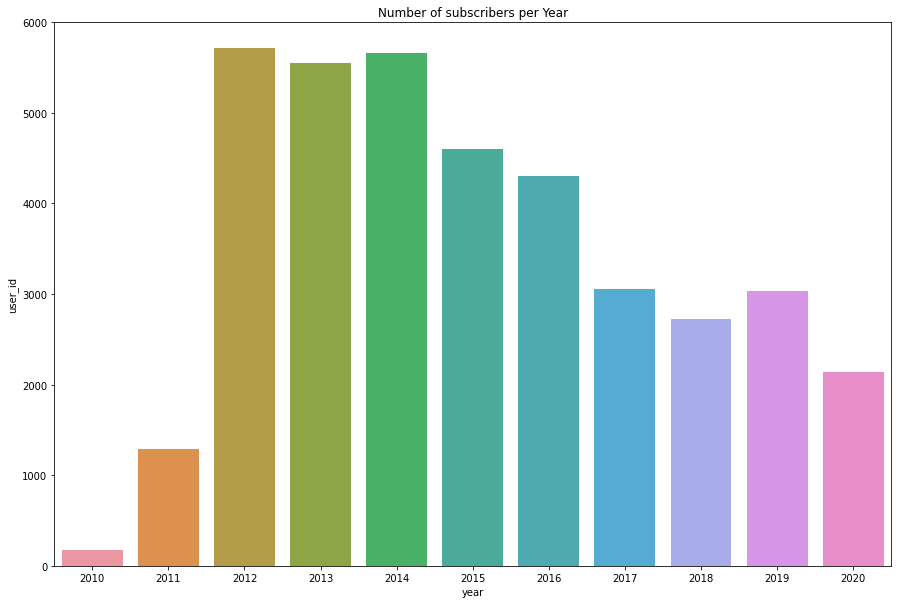

In [4]:
answer = subscribers.groupby(pd.Grouper(key='subscription_date', freq='Y')).agg({'user_id':'count'}).reset_index()
answer['year'] = answer.subscription_date.dt.year

# Set the figure size
plt.figure(figsize=(15, 10))

sns.barplot(x ="year", y="user_id", data=answer)
plt.title("Number of subscribers per Year")
plt.show()


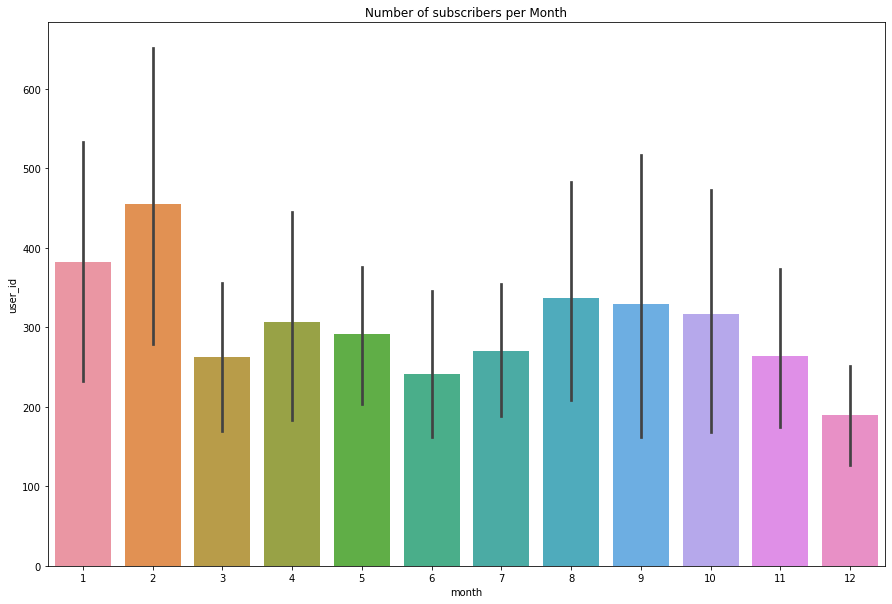

In [5]:
answer = subscribers.groupby(pd.Grouper(key='subscription_date', freq='M')).agg({'user_id':'count'}).reset_index()
answer['month'] = answer.subscription_date.dt.month

# Set the figure size
plt.figure(figsize=(15, 10))

sns.barplot(x ="month", y="user_id", data=answer)
plt.title("Number of subscribers per Month")
plt.show()

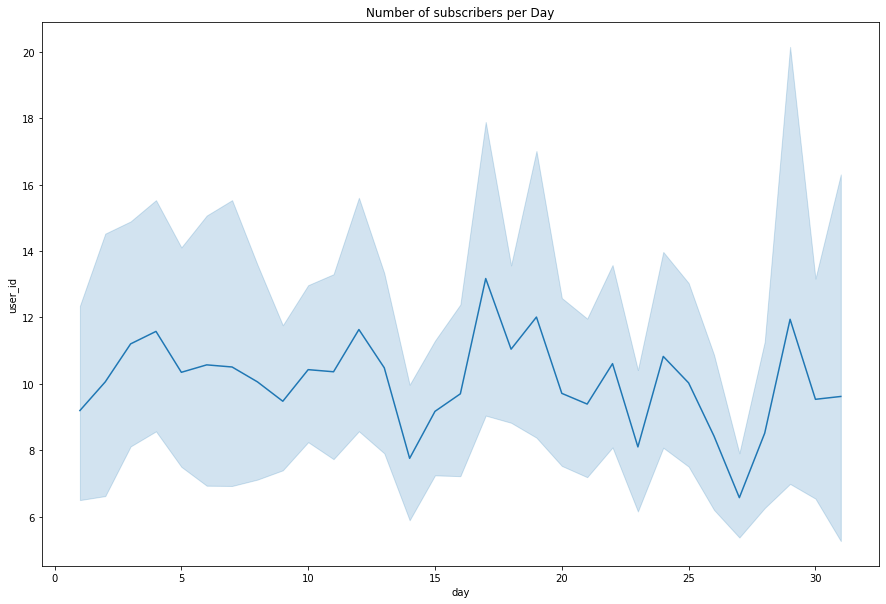

In [6]:
answer = subscribers.groupby(pd.Grouper(key='subscription_date', freq='D')).agg({'user_id':'count'}).reset_index()
answer['day'] = answer.subscription_date.dt.day

# Set the figure size
plt.figure(figsize=(15, 10))

sns.lineplot(x ="day", y="user_id", data=answer)
plt.title("Number of subscribers per Day")
plt.show()

In [7]:
answer = page_views.groupby('campaign').agg(
    {'user_id':'count'}).reset_index().sort_values(by='user_id', ascending=False)
answer

,campaign,user_id
5,email,79282
9,syndication,485
8,social,407
4,cpc,116
0,10today.ad3li.20200903.421.1,73
7,sms,14
2,10today.ad3li.20200903.smartflab.421.2,7
1,10today.ad3li.20200903.smartflab.421.1,4
3,ASKDRNANDI,3
6,foodandwine,3


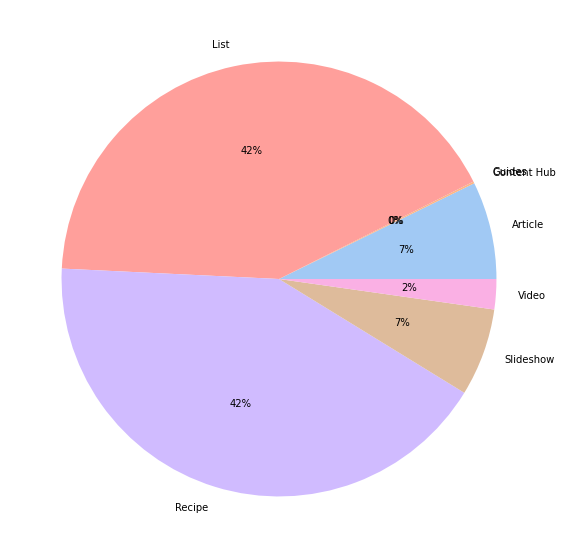

In [8]:
answer = page_views.groupby('article_format').agg({'user_id':'count'}).reset_index()

labels = list(answer.article_format.values)
data = list(answer.user_id.values)

colors = sns.color_palette('pastel')
# Set the figure size
plt.figure(figsize=(15, 10))

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [9]:
subscribers.describe()

,user_id,recipe_section_pageviews,food_section_pageviews,fashion_section_pageviews,beauty_section_pageviews,news_section_pageviews
count,3.826400e+04,38264.000000,38264.000000,38264.000000,38264.000000,38264.000000
mean,2.393002e+06,1.504626,1.962367,0.833473,0.248249,2.115958
std,1.398152e+06,3.588135,4.044592,2.059924,1.085827,4.905208
min,4.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.197014e+06,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.246652e+06,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.468496e+06,2.000000,2.000000,1.000000,0.000000,2.000000
max,4.940799e+06,327.000000,257.000000,129.000000,60.000000,212.000000


Merge both datasets on user_id. This allows for a single dataset.

Focusing only on food and recipe contents. 


In [10]:
page_views.article_format.unique()

array(['Recipe', 'List', 'Article', 'Slideshow', 'Content Hub', nan,
       'Video', 'Guides'], dtype=object)

In [11]:
all_data = pd.merge(page_views, subscribers[['user_id', 'subscription_date', 'recipe_section_pageviews', 'food_section_pageviews']], on='user_id')
all_data.sample(4)

,user_id,timestamp,page_path,page_title,campaign,page_referrer,article_publication_date,article_format,subscription_date,recipe_section_pageviews,food_section_pageviews
110529,3912561,2020-09-04 19:57:00,/food/whats-new-at-trader-joes,What's New at Trader Joe's: September 2020 - P...,email,NaN,2020-08-31,List,2018-05-25 03:01:26,0,1
261,1804074,2020-09-03 20:42:00,/recipes/sheet-pan-pancakes,Sheet-Pan Pancakes Recipe - PureWow,NaN,NaN,2020-07-14,Recipe,2014-01-21 11:07:42,5,5
69804,2882412,2020-09-02 20:35:00,/food/pioneer-woman-dessert-recipes-ree-drummond,10 Delicious Pioneer Woman Dessert Recipes - P...,NaN,https://www.google.com/,2018-01-29,Slideshow,2015-11-14 20:22:12,0,11
53706,2139616,2020-09-03 09:58:00,/food/labor-day-recipes,45 Easy Labor Day Recipes to Celebrate the End...,email,NaN,2020-06-22,List,2017-07-10 16:44:32,0,2


●	  How often are our users visiting in a week?  What is a good content velocity?

A good content velocity will be the content with the most viwership each day.

In [12]:
def weekday_name(x):
    weekDaysMapping = ("Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday","Sunday")
    return weekDaysMapping[x]

Text(0, 0.5, 'Day of Week')

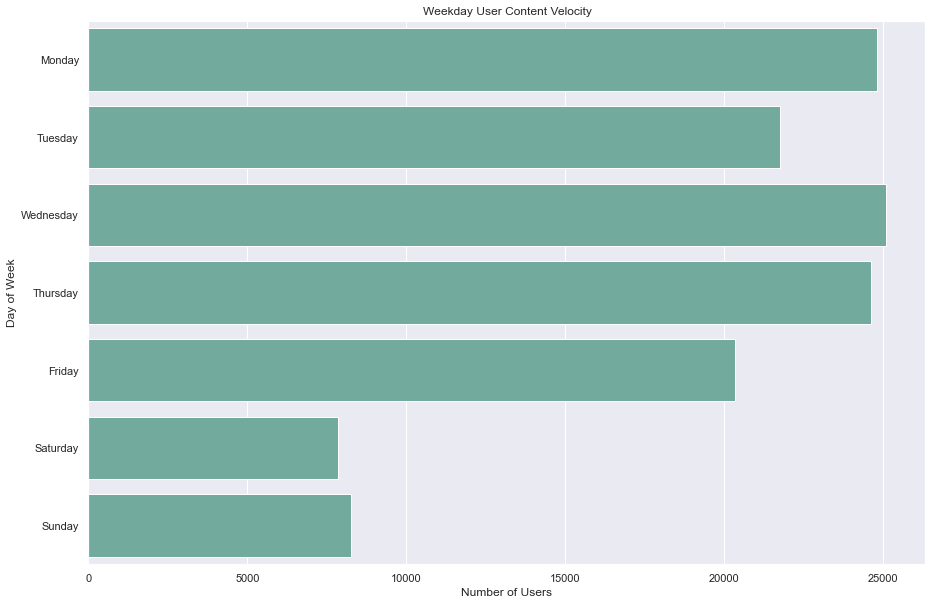

In [13]:
ans = all_data.groupby(all_data['timestamp'].dt.weekday).agg({'user_id': 'count'}).reset_index().rename(columns={'timestamp':'weekday'})
ans['weekday'] = ans['weekday'].apply(lambda x: weekday_name(x))

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(15, 10))

# plot a bar chart
sns.barplot(x="user_id", y="weekday",  data=ans, 
    estimator=sum, ci=None, color='#69b3a2')
plt.title('Weekday User Content Velocity')
plt.xlabel('Number of Users')
plt.ylabel('Day of Week')

What was the best content format during the week?

Text(0.5, 0, 'Day of Week')

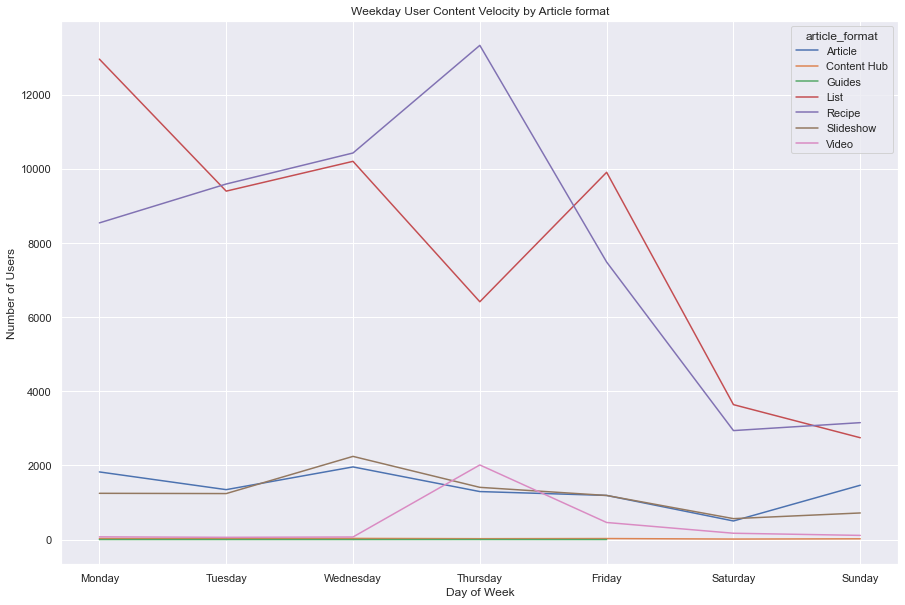

In [14]:
ans = all_data.groupby([all_data['timestamp'].dt.weekday, all_data.article_format]).agg({'user_id': 'count'}).reset_index().rename(columns={'timestamp':'weekday'})
ans['weekday'] = ans['weekday'].apply(lambda x: weekday_name(x))

sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(15, 10))

# plot a bar chart
sns.lineplot(y="user_id", x="weekday",  data=ans, 
    hue='article_format', ci=None)
plt.title('Weekday User Content Velocity by Article format')
plt.ylabel('Number of Users')
plt.xlabel('Day of Week')

###### A good content here are 'Recipe' & 'List'. They are the most popular and most used by a ton of susbscribers. Thier least disearable days have more content than any oteer article formats. 

#### ●	Are there common themes about the content that is getting the most traction?

##### Approach:
###### We will segement the data to only look at 'List and Recipes' only then we can aggregae based on  an hourly manner to see which content yields more traction. Moreover, we will see which media is used for those recipes are every given hour

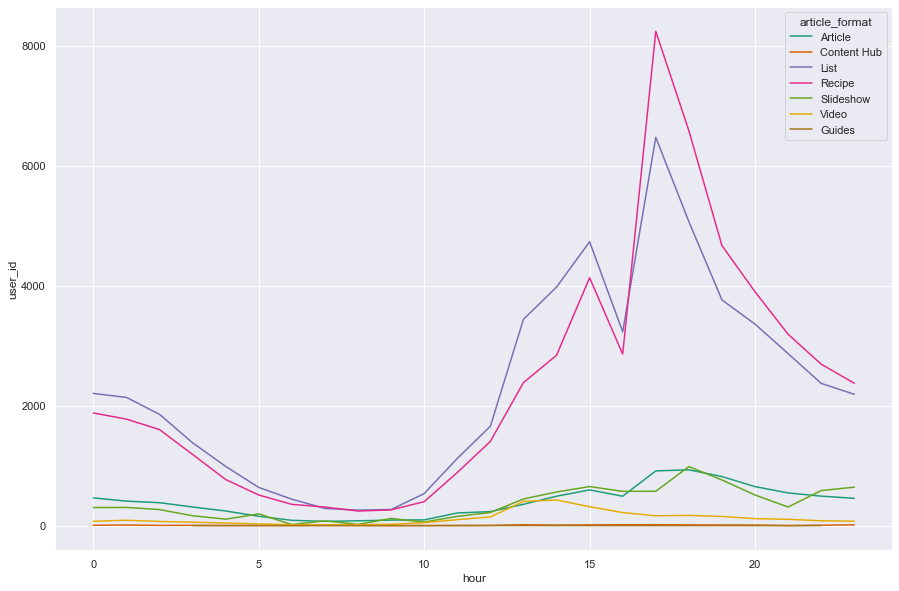

In [15]:
ans = all_data.groupby([all_data['timestamp'].dt.hour,all_data.article_format]).agg({'user_id': 'count'}).reset_index().rename(columns={'timestamp':'hour'})


# Set the figure size
plt.figure(figsize=(15, 10))

sns.lineplot(x='hour', y='user_id', hue='article_format', data=ans, palette='Dark2', ci=None)
plt.show()


###### It seems list leads the way for almost 2/3 of the day despite been closely followed by recipe through out. We do see a sudden change aroud 16 hours(4pm) which shows a distinct pattern. Users who create list or view a list article are more likely to use a recipe between 4 pm going. 

###### Let's take a little deep dive into the hours 5-10 for only list and recipe article formats. This line graph shows a similar patterns so lets see what insights we can gather from there.

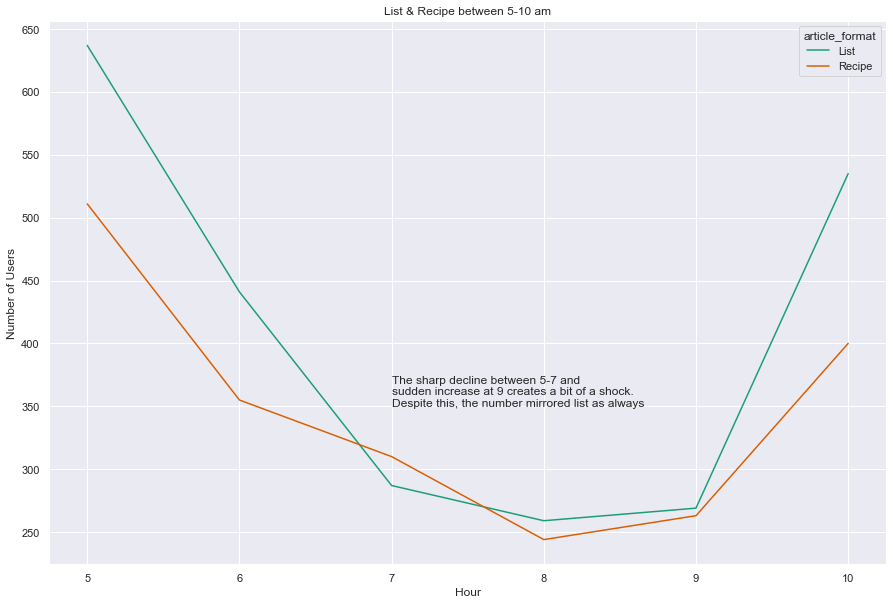

In [16]:
data1 = ans[( ans.hour.isin([5,6,7,8,9,10]) ) & (ans.article_format.isin(['List', 'Recipe']))]

# Set the figure size
plt.figure(figsize=(15, 10))

sns.lineplot(x='hour', y='user_id', hue='article_format', 
             data=data1, palette='Dark2', ci=None)
plt.xlabel('Hour')
plt.ylabel('Number of Users')
plt.title('List & Recipe between 5-10 am')
plt.text(7, 350,
         'The sharp decline between 5-7 and \nsudden increase at 9 creates a bit of a shock.\nDespite this, the number mirrored list as always')
plt.show()

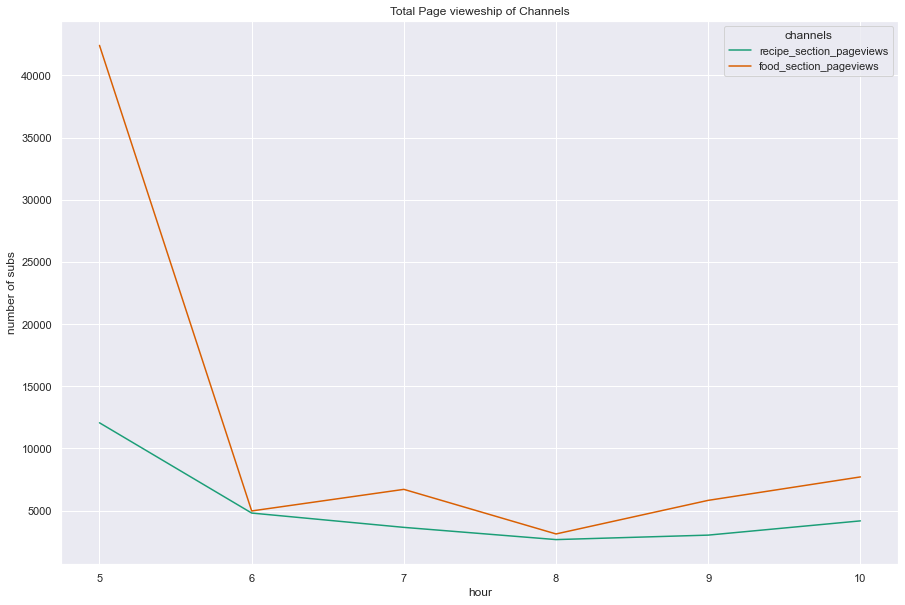

In [17]:
data2 = all_data[all_data.timestamp.dt.hour.isin([5,6,7,8,9,10])]

# Set the figure size
plt.figure(figsize=(15, 10))

answer = data2.loc[:, ['timestamp', 'recipe_section_pageviews', 'food_section_pageviews']] 
answer['hour'] = answer.timestamp.dt.hour
answer = answer.loc[:, 'recipe_section_pageviews':'hour']
answer = pd.melt(answer, 'hour',var_name='channels', 
              value_name='number of subs')
answer
sns.lineplot(x='hour', y='number of subs', hue='channels', estimator=sum, 
             data=answer,palette='Dark2', ci=None)
plt.title('Total Page vieweship of Channels')
plt.show()

##### Are people finding our content through other channels?  Is there a way we might capitalize on this?


In [18]:
all_data.campaign.value_counts(normalize=True)*100

email                                     98.615568
syndication                                0.603279
social                                     0.506257
cpc                                        0.144289
10today.ad3li.20200903.421.1               0.090803
sms                                        0.017414
10today.ad3li.20200903.smartflab.421.2     0.008707
10today.ad3li.20200903.smartflab.421.1     0.004975
ASKDRNANDI                                 0.003732
foodandwine                                0.003732
yummly                                     0.001244
Name: campaign, dtype: float64

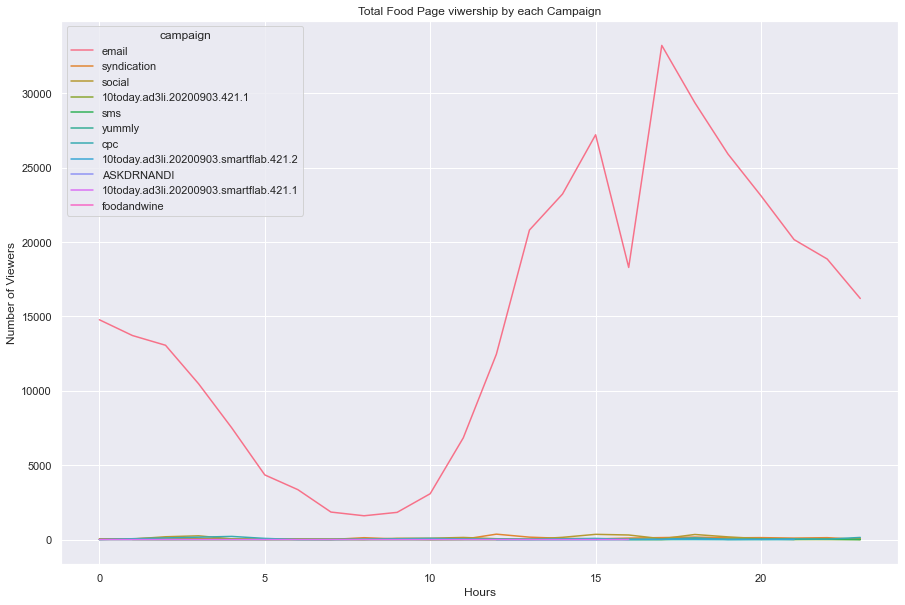

In [19]:

# Set the figure size
plt.figure(figsize=(15, 10))

answer = all_data[['timestamp', 'campaign', 'recipe_section_pageviews', 'food_section_pageviews']]
sns.lineplot(x=answer.timestamp.dt.hour, y='food_section_pageviews', 
             estimator=sum, hue='campaign', data=answer, ci=None)
plt.xlabel('Hours')
plt.ylabel('Number of Viewers')
plt.title('Total Food Page viwership by each Campaign')
plt.show()


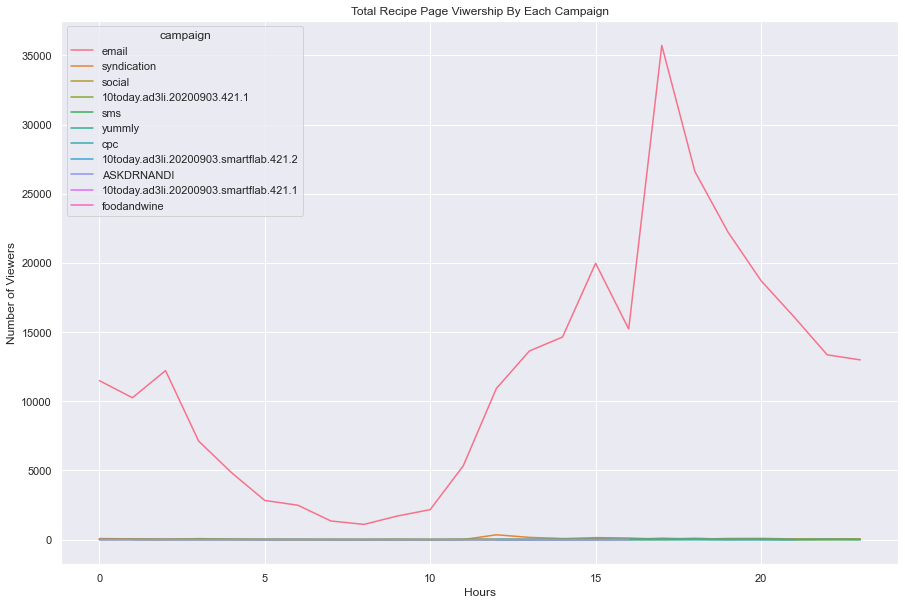

In [20]:
# Set the figure size
plt.figure(figsize=(15, 10))

answer = all_data[['timestamp', 'campaign', 'recipe_section_pageviews', 'food_section_pageviews']]

sns.lineplot(x=answer.timestamp.dt.hour, y='recipe_section_pageviews', estimator=sum, hue='campaign', data=answer, ci=None)
plt.xlabel('Hours')
plt.ylabel('Number of Viewers')
plt.title('Total Recipe Page Viwership By Each Campaign')
plt.show()

######  Emails dominate all platforms are about 98% of the total data. Let's exclude emails and see if there is any siginificant outcoms from certain data measures. Lets also see the averages for those as well.

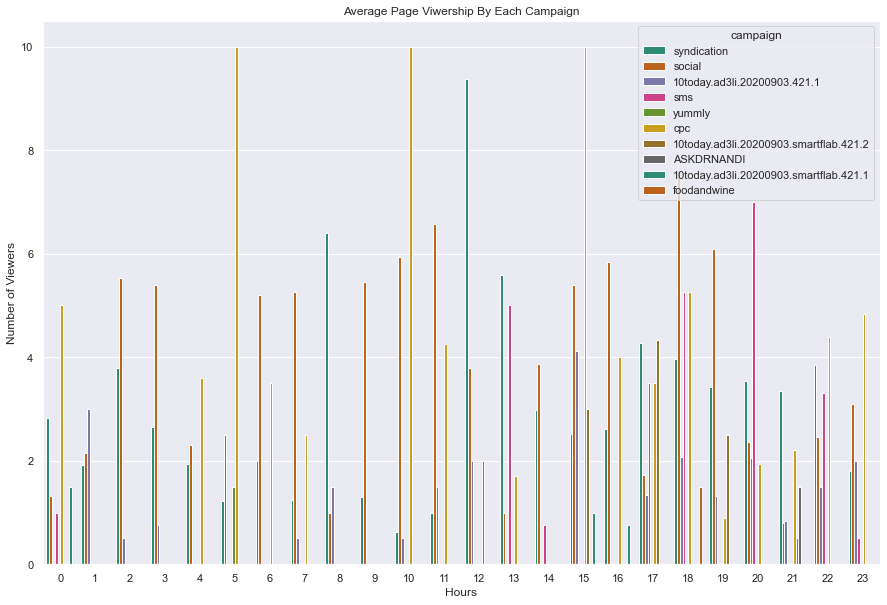

In [21]:
import numpy as np

# Set the figure size
plt.figure(figsize=(15, 10))

answer = all_data[['timestamp', 'campaign', 'recipe_section_pageviews', 'food_section_pageviews']]
answer = answer[answer.campaign != 'email']
answer = pd.melt(answer, ('timestamp', 'campaign'),var_name='channels', 
              value_name='number of subs', )

sns.barplot(x=answer.timestamp.dt.hour, y='number of subs', estimator=np.mean,
             hue='campaign', data=answer, ci=None,palette='Dark2')
plt.xlabel('Hours')
plt.ylabel('Number of Viewers')
plt.title('Average Page Viwership By Each Campaign')
plt.show()

###### The Average didnt tell us much, lets see what the data looks durng the day. Syndication and OPC  mostly thorughout. Do they doninate each day as well? 

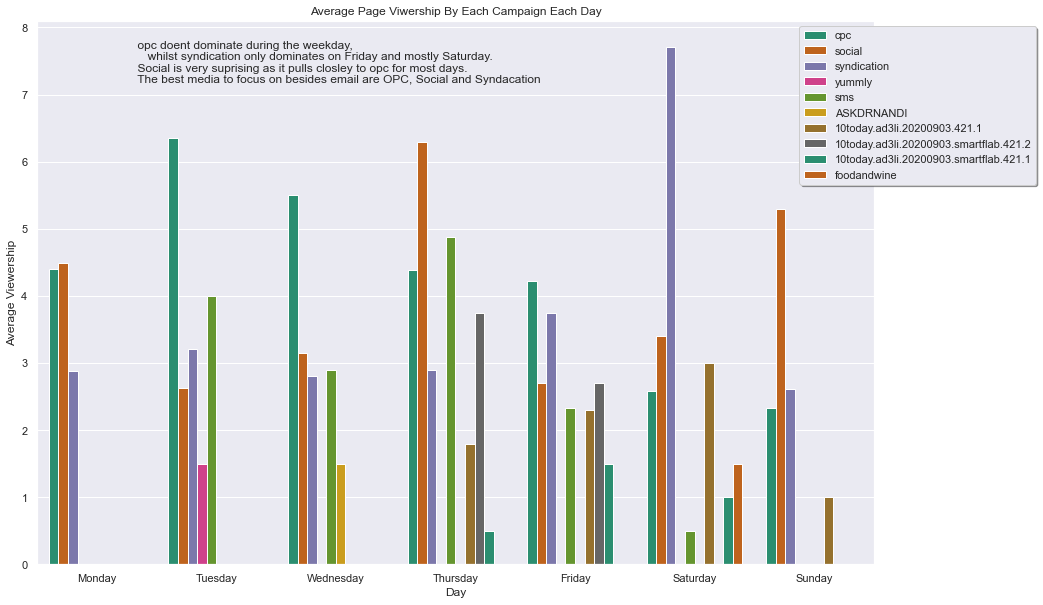

In [22]:

# Set the figure size
plt.figure(figsize=(15, 10))

answer['weekday'] = answer['timestamp'].dt.weekday.apply(lambda x: weekday_name(x))

answer.weekday = pd.Categorical(answer.weekday,
                            categories=['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday', 'Sunday'],
                            ordered=True)

df = answer.sort_values('weekday')

# Set the figure size
sns.barplot(x='weekday', y='number of subs', estimator=np.mean,
             hue='campaign', data=df, ci=None,palette='Dark2')

plt.xlabel('Day')
plt.ylabel('Average Viewership')
plt.title('Average Page Viwership By Each Campaign Each Day')
plt.text(0, 7, 
         '''
            opc doent dominate during the weekday, 
               whilst syndication only dominates on Friday and mostly Saturday.
            Social is very suprising as it pulls closley to opc for most days. 
            The best media to focus on besides email are OPC, Social and Syndacation
         ''')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1),fancybox=True,shadow=True)
plt.show()

#### ● What is a good time to send our Emails?

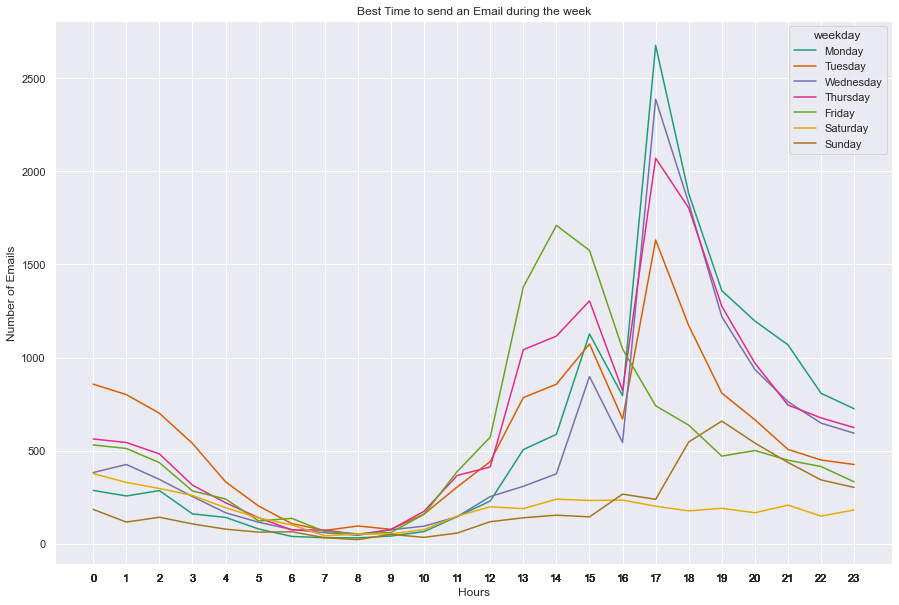

In [23]:
# Set the figure size
plt.figure(figsize=(15, 10))

answer = all_data[['timestamp', 'campaign', 'recipe_section_pageviews', 'food_section_pageviews']]
answer = answer[answer.campaign == 'email']
answer['hour'] = answer.timestamp.dt.hour
answer['weekday'] = answer['timestamp'].dt.weekday.apply(lambda x: weekday_name(x))
answer.weekday = pd.Categorical(answer.weekday,
                            categories=['Monday', 'Tuesday', 'Wednesday',
                                        'Thursday', 'Friday', 'Saturday', 'Sunday'],
                            ordered=True)

df = answer.groupby(['hour', 'weekday']).agg({'campaign':'count'}).reset_index()

sns.lineplot(x='hour', y='campaign', data=df, hue='weekday', palette='Dark2')
plt.xticks(df.hour)
plt.xlabel('Hours')
plt.ylabel('Number of Emails')
plt.title('Best Time to send an Email during the week')
plt.show()

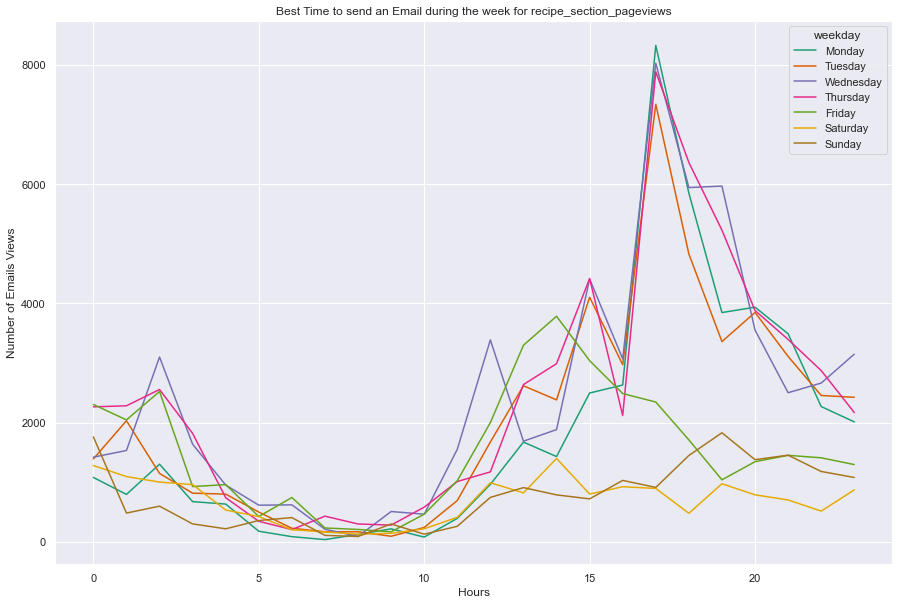

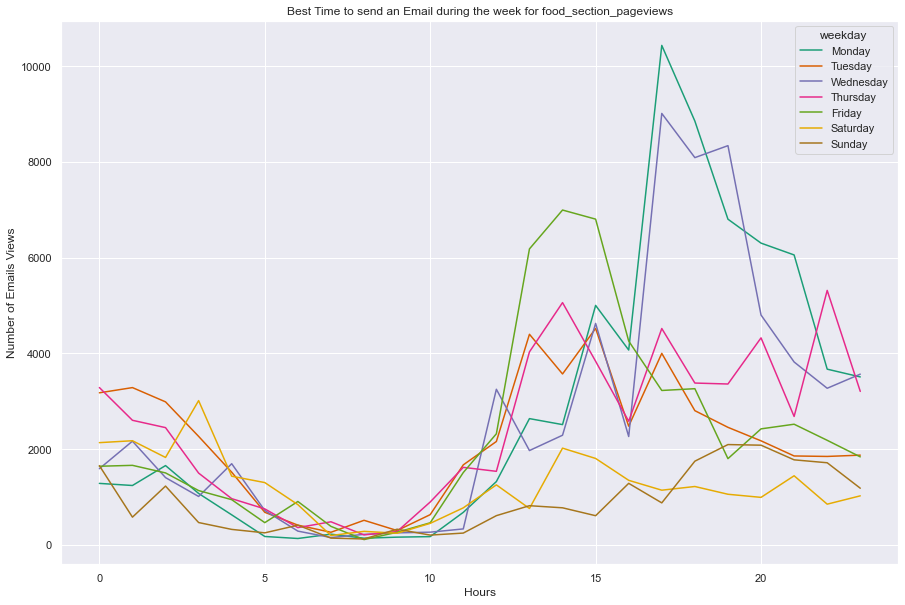

In [25]:

for value in ['recipe_section_pageviews', 'food_section_pageviews']:
    # Set the figure size
    plt.figure(figsize=(15, 10))
    
    sns.lineplot(x='hour',y=value, hue='weekday', 
                 data=answer ,ci=None, palette='Dark2',estimator=sum)
    plt.xlabel('Hours')
    plt.ylabel('Number of Emails Views')
    plt.title(f'Best Time to send an Email during the week for {value}')
    plt.show()